<a href="https://colab.research.google.com/github/GeorgiyPegov/learning-2023/blob/main/Homework_6_Georgiy_Pegov_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Подготовка df

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# pd.read_csv('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')

In [ ]:
url = 'https://drive.google.com/file/d/1ljBzOxmiLTqMZDljbzL3q0U9lOANhk0G/view?usp=sharing'
dataset_url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [ ]:
pd.read_csv(dataset_url)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = pd.read_csv(dataset_url)

In [ ]:
# df.dropna()

Для определения оптимальной логики замещения данных необходимо вывести количество пустых ячеек по столбцам.

In [ ]:
print ('empty cells total -',df.isna().sum().sum(),'\n',df.isna().sum())

empty cells total - 866 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Вывод: пустые ячейки Age - добавляем средние значения, Cabin - замещение пустых ячеек на уникальное значение (оригинальные номера кают необходимо оставить, т.к. они являются в т.ч. данными по расположеню кают на корабле, что является ценной информацией), Embarked - заменяем на наиболее частое значение столбца, т.к. его влияние на анализ данных не существенно.

In [ ]:
df.Age[df.Age.isna()] = df.Age.mean()

<ipython-input-15-86820ac969ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[df.Age.isna()] = df.Age.mean()


In [ ]:
df[df.Cabin == 'UCabin']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Проверка значения UCabin на ункальность

In [ ]:
df.Cabin[df.Cabin.isna()] = 'UCabin'

<ipython-input-17-b6c09e022bc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Cabin[df.Cabin.isna()] = 'UCabin'


In [ ]:
df.Embarked[df.Embarked.isna()] = 'S'

<ipython-input-18-ad9999733c57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked.isna()] = 'S'


In [ ]:
print ('empty cells total -',df.isnull().sum().sum(),'\n',df.isnull().sum())

empty cells total - 0 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Проверка замещения пустых ячеек

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Аналитика по df

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

Количество уникальных значений

# Аналитика

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfa = df.copy()

In [ ]:
dfa.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
dfa.loc[:, 'Sex'] = dfa['Sex'].astype('category').cat.codes
dfa.loc[:, 'Cabin'] = dfa['Cabin'].astype('category').cat.codes
dfa.loc[:, 'Embarked'] = dfa['Embarked'].astype('category').cat.codes



<ipython-input-25-b4854f6f18b1>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfa.loc[:, 'Sex'] = dfa['Sex'].astype('category').cat.codes
<ipython-input-25-b4854f6f18b1>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfa.loc[:, 'Cabin'] = dfa['Cabin'].astype('category').cat.codes
<ipython-input-25-b4854f6f18b1>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if colu

In [ ]:
dfa.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [ ]:
dfa2 = dfa.drop(columns=['PassengerId'])

In [ ]:
dfa2.corr().style.background_gradient(cmap="hot_r")

<ipython-input-28-0fc97abfaae8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfa2.corr().style.background_gradient(cmap="hot_r")


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.254888,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.684121,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.096681,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.235406,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.043593,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.028324,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.503355,-0.224719
Cabin,-0.254888,0.684121,0.096681,-0.235406,0.043593,-0.028324,-0.503355,1.000000,0.202520
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,0.202520,1.000000


Наибольшее влияние на признак Survived имеет признак Sex и Fare

# Homework 6 Визуализация данных

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dfa2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


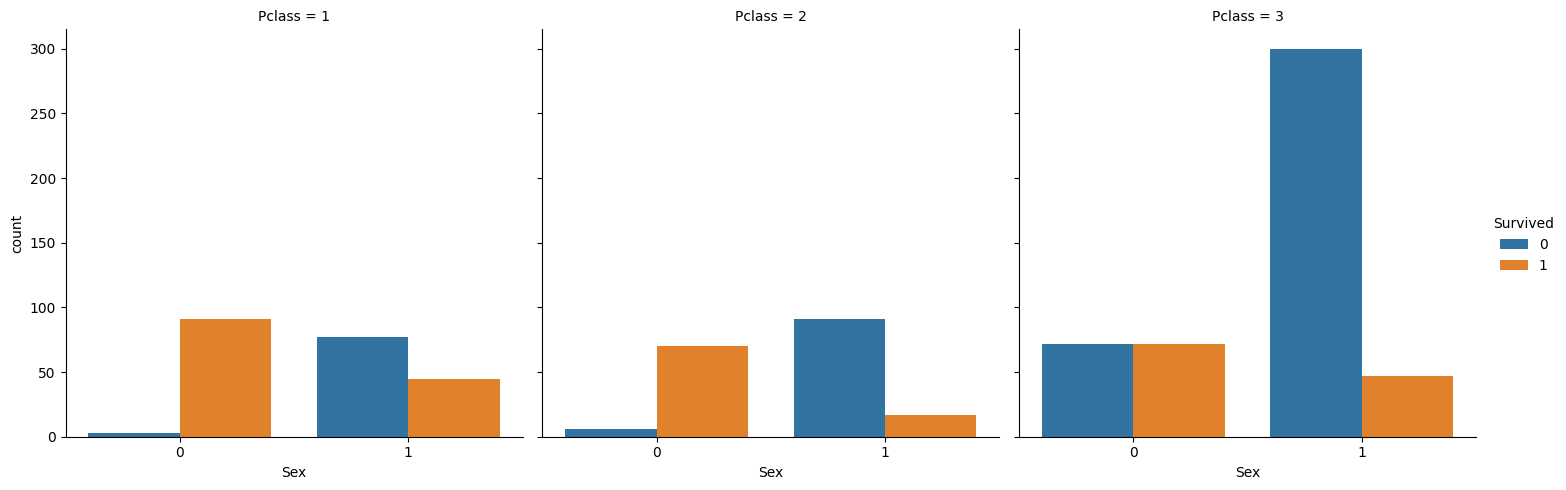

In [ ]:
sns.catplot(data = dfa2, x ='Sex', hue ='Survived',
kind ='count', col ='Pclass')

Больше шансов выжить было у пассажиров 1 класса (женщины и мужчины). У пассажиров-мужчин 2 и 3 класса шансов выжить было меньше. У пассажиров-женщин 3 класса шансов выжить было меньше.

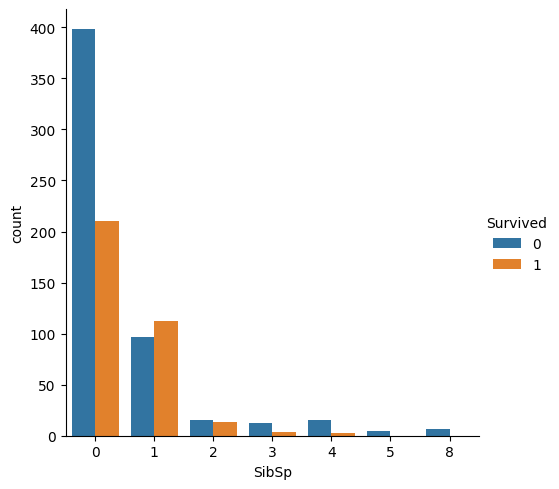

In [ ]:
sns.catplot(x ='SibSp', hue ='Survived',
kind ='count', data = dfa2)

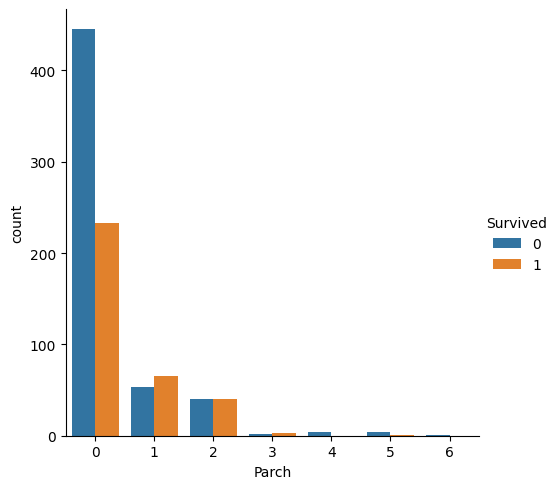

In [ ]:
sns.catplot(x ='Parch', hue ='Survived',
kind ='count', data = dfa2)

Опровергнуть предположение, что "одиночке" выжить было проще не могу. Т.к. на визуализации пассажиры с 3 или более родственниками чаще погибали. Исходя из визуализации можно предположить, что пассажиры с 1 или 2 родственниками выживали чаще, однако также можно предположить, что всего один из нескольких членов семьи выживал, что отразилось на статистике.

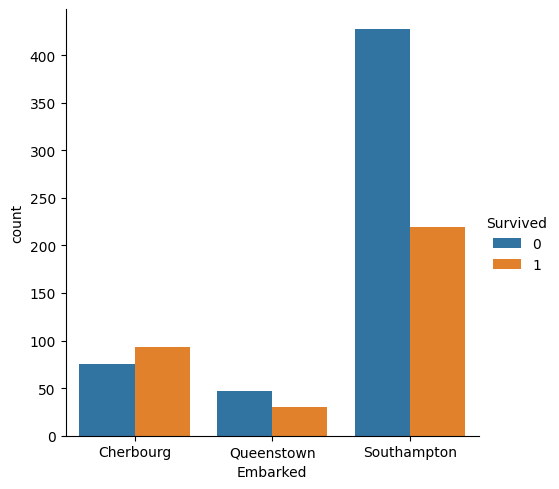

In [ ]:
z = sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', data = dfa2)
z.set(xticklabels=["Cherbourg", "Queenstown", "Southampton"])

У пассажиров, севших в Саутгемптоне смертность выше, чем у севших в Шербурге и Куинстауне.